## Modeling Churn Behavior of Customers
In this model the churn behavior of customers of a bank is predicted.
Churn is a measure of how many stop using a product

### Step 1: Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We may import other libraries needed as we go along

### Step 2: Reading the data

In [5]:
churn = pd.read_csv('Churn_Modelling.csv')

### Step 3: Exploring and Cleaning the data

In [3]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<AxesSubplot:>

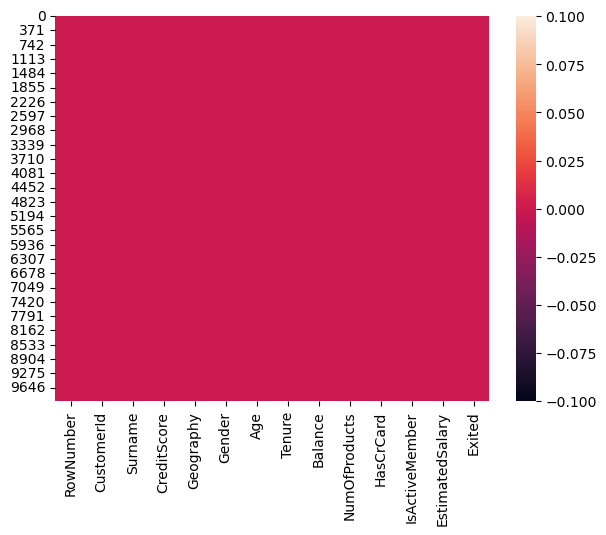

In [9]:
plt.figure(figsize=(7,5))
sns.heatmap(churn.isnull())

It is a good sign that there is no missing value in the heat map. It is no missing spot.

C:\Users\poory\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

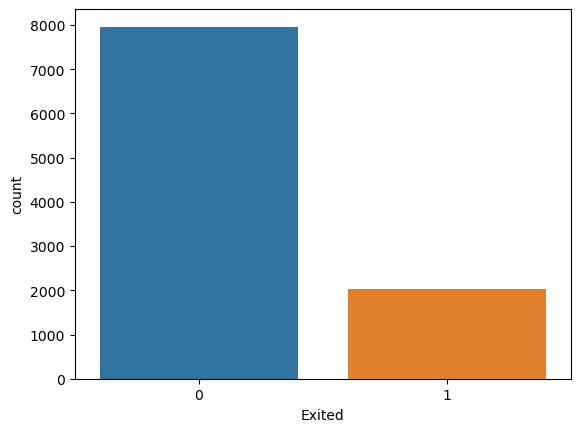

In [11]:
#Let's see the countplot of the target column. How many customers have exited the program?
sns.countplot('Exited',data = churn)

#### The three columns of 'RowNumber','CustomerId' and 'Surname' do not seem to affect the final decision of the customers. It would be wise to drop the columns as a step of data cleaning. According to my experience, it is always a good idea to keep the original data set and do the changes on a copy of it.

In [13]:
df = churn
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
# Let's check out how many genders have been defined for the customers
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

#### There are lots of ways to assign numerical values to the binary columns such as Gender column. I usually prefer to define a dictionary instead of LabelEncoder when the column is binary as is one of the features. LabelEncoder is better be used for multiclass categorical columns and the target column.

In [17]:
gender_dict = {'Male':1,'Female':0}
df['Gender'] = df['Gender'].map(gender_dict)

In [18]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [19]:
# We check to see how many countries the customers are from?
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

#### Since the 'Geography' column is not a binary one, we should do one hot encoding to get numerical values instead of this column

In [20]:
df2 = df
df2 = pd.get_dummies(df2, columns=['Geography'],drop_first = True)

In [21]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


#### Moving the 'Exited' column to the end of the data set would be beneficial, as it would enhance the overall organization and structure of the data.

In [22]:
df2['EXITED'] = df2['Exited']
df2 = df2.drop('Exited',axis=1)

In [23]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,EXITED
0,619,0,42,2,0.00,1,1,1,101348.88,0,0,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0,1
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1,0


#### By determining the correlation between each feature and the churn column, we can gain further insights into whether additional data cleaning is necessary.

<AxesSubplot:>

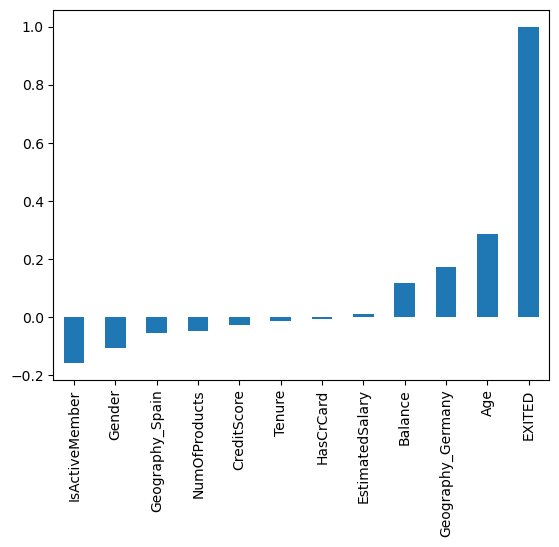

In [24]:
df2.corr()['EXITED'].sort_values().plot(kind = 'bar')

<AxesSubplot:>

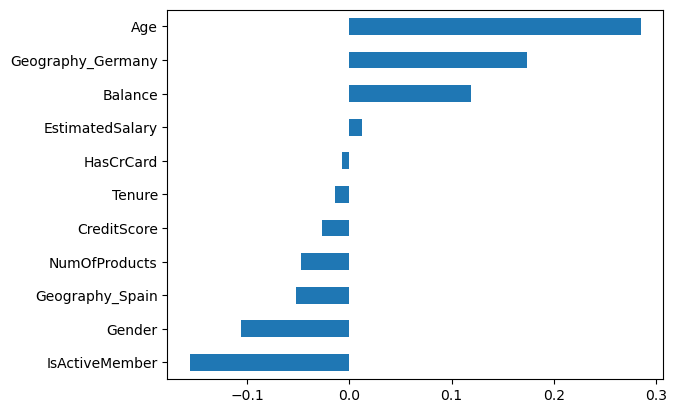

In [25]:
df2.corr()['EXITED'].sort_values().drop('EXITED').plot(kind = 'barh')

<AxesSubplot:>

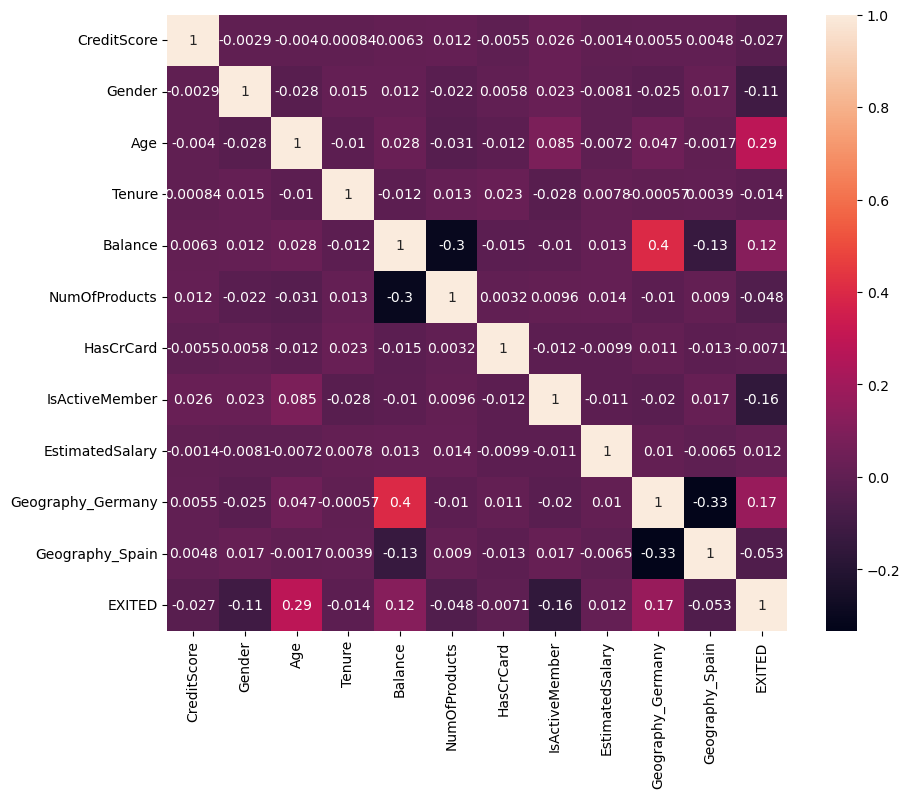

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(), annot = True)

#### Since the biggest correlation is less than 30%, it is not a good idea to drop any other of features. This means that we are done with data cleaning

### Step 4: Preprocessing

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
# When we have binary columns, MinMaxScaler works better that Standard Scaler. Standard Scaler changes the values
# of the binary features.
MMS = MinMaxScaler()

In [33]:
X = df2.drop('EXITED',axis=1)
y = df2['EXITED']

In [34]:
X = MMS.fit_transform(X)

In [37]:
# It is still beneficial to make a new data frame for X
X = pd.DataFrame(X,columns = df2.columns[:-1])

In [39]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,0.538,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,0.0,0.0
1,0.516,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1.0
2,0.304,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,0.0,0.0
3,0.698,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.0
4,1.000,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,1.0


### Step 5: Modeling

### Model 1: Logistic Regression

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
# Random_state only determines the randomly selection process of the data. It can be any numbers

In [42]:
LR = LogisticRegression()

In [43]:
LR.fit(X_train,y_train)

LogisticRegression()

In [44]:
prediction_1 = LR.predict(X_test)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
print(classification_report(prediction_1,y_test))
print(confusion_matrix(y_test,prediction_1))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      2808
           1       0.19      0.61      0.29       192

    accuracy                           0.81      3000
   macro avg       0.58      0.72      0.59      3000
weighted avg       0.92      0.81      0.85      3000

[[2304   74]
 [ 504  118]]


#### The results for class 1 is much lower. One reason is there are much fewer 1 class (the customers who exited the program) than the 0 class. But f1-score of 0.29 is not acceptable. The number of errors on the secondry diagonal are pretty big.

### Model 2: K-Nearest Neighbors (KNN)

#### For K-Nearest Neighbors the most important parameter is "K" (the number of neighbors we make the classification based on). One way is to fit the model with different 'K's and find the one that gives the smallest error

In [47]:
from sklearn.neighbors import KNeighborsClassifier

C:\Users\poory\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\poory\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\poory\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\poory\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\poory\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\poory\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\poory\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\poory\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\poory\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\poory\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\poory\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\poory\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\poory\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\poory\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

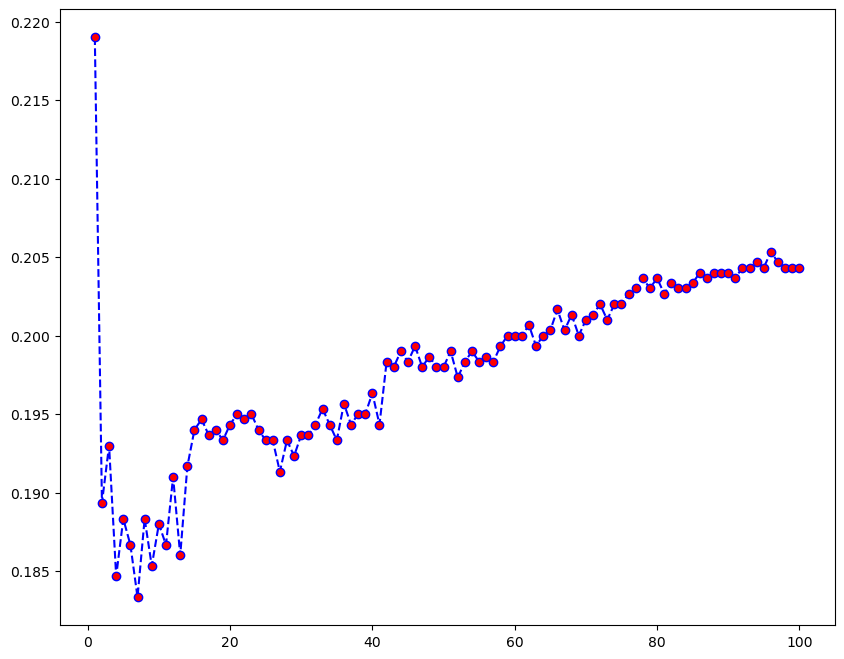

In [50]:
error_rate = []
for i in range(1,101):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train)
    prediction_i = KNN.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))
plt.figure(figsize=(10,8))
plt.plot(range(1,101),error_rate,linestyle = 'dashed', marker = 'o', color = 'blue',markerfacecolor = 'red' )

In [51]:
# It is seen that for K = 7 the error is the smallest. So we apply the model with this number of neighbors
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train,y_train)
prediction_2 = KNN.predict(X_test)

C:\Users\poory\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [52]:
print(classification_report(prediction_2,y_test))
print(confusion_matrix(y_test,prediction_2))

              precision    recall  f1-score   support

           0       0.96      0.84      0.89      2720
           1       0.28      0.63      0.39       280

    accuracy                           0.82      3000
   macro avg       0.62      0.73      0.64      3000
weighted avg       0.89      0.82      0.85      3000

[[2274  104]
 [ 446  176]]


#### KNN works better than Logistic Regression but for the class 1 it still does not work good.

### Model 3: Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
DTC = DecisionTreeClassifier()

In [56]:
DTC.fit(X_train,y_train)
prediction_3 = DTC.predict(X_test)

In [57]:
print(classification_report(prediction_3,y_test))
print(confusion_matrix(y_test,prediction_3))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      2362
           1       0.53      0.51      0.52       638

    accuracy                           0.80      3000
   macro avg       0.70      0.69      0.70      3000
weighted avg       0.80      0.80      0.80      3000

[[2067  311]
 [ 295  327]]


#### Decision Tree Classifier worked much better than the first two models. The performance of a decision tree could usually be improved by repeating the process and making several trees and find an average of the overall performance of all trees. This bunch of different dicision trees is called "Random Forest"

### Model 4: Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
RFC = RandomForestClassifier(n_estimators=200)

In [60]:
RFC.fit(X_train,y_train)
prediction_4 = RFC.predict(X_test)

In [61]:
print(classification_report(prediction_4,y_test))
print(confusion_matrix(y_test,prediction_4))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2610
           1       0.49      0.78      0.60       390

    accuracy                           0.87      3000
   macro avg       0.73      0.83      0.76      3000
weighted avg       0.90      0.87      0.88      3000

[[2293   85]
 [ 317  305]]


#### Random Forest could reduce the False Positive (type I error) cases but False Negatives (type II error) is still high. The other model that might be useful is EXtreme Gradient Boost (XGBoost) 

### Model 5: XGBoost

In [62]:
from xgboost import XGBClassifier

In [63]:
XGBC = XGBClassifier()

In [64]:
XGBC.fit(X_train,y_train)
prediction_5 = XGBC.predict(X_test)

In [65]:
print(classification_report(prediction_5,y_test))
print(confusion_matrix(y_test,prediction_5))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      2526
           1       0.54      0.71      0.61       474

    accuracy                           0.86      3000
   macro avg       0.74      0.80      0.76      3000
weighted avg       0.88      0.86      0.87      3000

[[2239  139]
 [ 287  335]]


### Model 6: Artificial Neural Networks (ANNs)

In [68]:
X = X.values
y = y.values

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [71]:
model = Sequential()
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [72]:
model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

In [73]:
model.fit(X_train,y_train,batch_size = 32,epochs = 100)

Epoch 1/100
219/219 [==============================] - 3s 2ms/step - loss: 0.5705 - accuracy: 0.7237
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7979
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.7987
Epoch 4/100
219/219 [==============================] - 1s 2ms/step - loss: 0.4573 - accuracy: 0.8057
Epoch 5/100
219/219 [==============================] - 1s 2ms/step - loss: 0.4482 - accuracy: 0.8103
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.8126
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.8160
Epoch 8/100
219/219 [==============================] - 1s 2ms/step - loss: 0.4267 - accuracy: 0.8177
Epoch 9/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.8197
Epoch 10/100
219/219 [==============================] - 1s 2ms/step - loss: 0.4154 - accura

219/219 [==============================] - 0s 2ms/step - loss: 0.3471 - accuracy: 0.8583
Epoch 82/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.8580
Epoch 83/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.8580
Epoch 84/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3476 - accuracy: 0.8587
Epoch 85/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8590
Epoch 86/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3464 - accuracy: 0.8576
Epoch 87/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3467 - accuracy: 0.8583
Epoch 88/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3462 - accuracy: 0.8593
Epoch 89/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3459 - accuracy: 0.8606
Epoch 90/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 

In [74]:
losses = model.history.history
losses = pd.DataFrame(losses)

<AxesSubplot:>

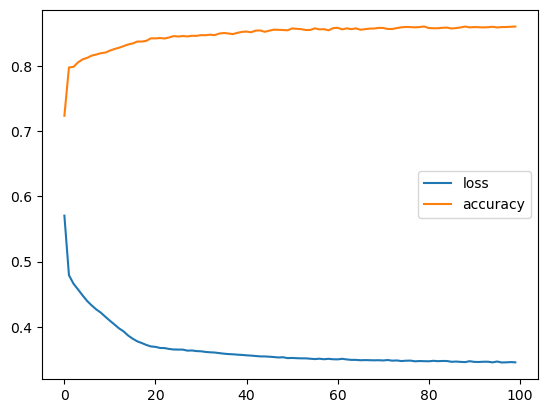

In [75]:
losses.plot()

In [76]:
prediction_6 = model.predict(X_test)

94/94 [==============================] - 2s 2ms/step


In [77]:
prediction_6 = (prediction_6 > 0.5)

In [79]:
print(classification_report(prediction_6,y_test))
print(confusion_matrix(y_test,prediction_6))

              precision    recall  f1-score   support

       False       0.95      0.88      0.91      2559
        True       0.51      0.72      0.60       441

    accuracy                           0.86      3000
   macro avg       0.73      0.80      0.75      3000
weighted avg       0.88      0.86      0.87      3000

[[2254  124]
 [ 305  317]]


### Will a customer with following features leave the bank?
##### Geography: France
##### Credit Score: 600
##### Gender: Male
##### Age: 40 years old
##### Tenure: 3 years
##### Balance: 60,000
##### Number of products: 2
##### Does he have a credit card? Yes
##### Is he an active member? Yes
##### Estimated Salary: $50,000

In [93]:
new_customer = MMS.transform([[600,1,40,3,60000,2,1,1,50000,0,0]])
model.predict(new_customer)>0.5

1/1 [==============================] - 0s 29ms/step


C:\Users\poory\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[False]])

## Which means that the customer will NOT leave the bank!